# Topic 28 - Microbes Classification

## EDA

### Libraries and Data loading

In [1675]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams["figure.dpi"] =  100
df = pd.read_csv('microbes.csv')
df.drop(columns=['Unnamed: 0'], inplace=True)

### Structure of the dataset

Now we take a look at overall dataset structure

In [1676]:
print('features:\n', df.columns, end='\n\n')
print(df.head(3), end='\n\n')
print(f'number of rows: {df.shape[0]}\nnumber of columns: {df.shape[1]}', end='\n\n')

features:
 Index(['Solidity', 'Eccentricity', 'EquivDiameter', 'Extrema', 'FilledArea',
       'Extent', 'Orientation', 'EulerNumber', 'BoundingBox1', 'BoundingBox2',
       'BoundingBox3', 'BoundingBox4', 'ConvexHull1', 'ConvexHull2',
       'ConvexHull3', 'ConvexHull4', 'MajorAxisLength', 'MinorAxisLength',
       'Perimeter', 'ConvexArea', 'Centroid1', 'Centroid2', 'Area', 'raddi',
       'microorganisms'],
      dtype='object')

   Solidity  Eccentricity  EquivDiameter  Extrema  FilledArea  Extent  \
0     10.70          15.8           5.43     3.75       0.785    8.14   
1      5.60          18.3           4.14     6.16       0.364    3.51   
2      8.32          19.8           4.63     6.66       0.415    5.85   

   Orientation  EulerNumber  BoundingBox1  BoundingBox2  ...  ConvexHull4  \
0         2.15         22.3          2.97          10.9  ...         2.97   
1        18.60         22.5          5.41          19.2  ...         5.47   
2        21.00         22.4          5.

We can see that the dataset has **30527** samples and **26** features

Lets now investigate what types given features have.  
As well as check if we have any missing/zero values.

In [1677]:
print(df.info(), end='\n\n')
print('missing values: ', (df.isna().any().any()))
print('zero values: ', (df==0.0).any().any())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30527 entries, 0 to 30526
Data columns (total 25 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Solidity         30527 non-null  float64
 1   Eccentricity     30527 non-null  float64
 2   EquivDiameter    30527 non-null  float64
 3   Extrema          30527 non-null  float64
 4   FilledArea       30527 non-null  float64
 5   Extent           30527 non-null  float64
 6   Orientation      30527 non-null  float64
 7   EulerNumber      30527 non-null  float64
 8   BoundingBox1     30527 non-null  float64
 9   BoundingBox2     30527 non-null  float64
 10  BoundingBox3     30527 non-null  float64
 11  BoundingBox4     30527 non-null  float64
 12  ConvexHull1      30527 non-null  float64
 13  ConvexHull2      30527 non-null  float64
 14  ConvexHull3      30527 non-null  float64
 15  ConvexHull4      30527 non-null  float64
 16  MajorAxisLength  30527 non-null  float64
 17  MinorAxisLen

As we can see the dataset does not have any missing points, however, it has zero values, which needs to be investigated further.

In [1678]:
df.describe()

,Solidity,Eccentricity,EquivDiameter,Extrema,FilledArea,Extent,Orientation,EulerNumber,BoundingBox1,BoundingBox2,...,ConvexHull3,ConvexHull4,MajorAxisLength,MinorAxisLength,Perimeter,ConvexArea,Centroid1,Centroid2,Area,raddi
count,30527.000000,30527.000000,30527.000000,30527.000000,30527.000000,30527.000000,30527.000000,30527.000000,30527.000000,30527.000000,...,30527.000000,30527.000000,30527.000000,30527.000000,30527.000000,30527.000000,30527.000000,30527.000000,30527.00000,30527.000000
mean,9.677744,19.466921,3.633348,11.871832,0.420022,5.840625,11.751004,22.380901,10.919027,10.399429,...,11.046482,11.021988,1.605159,1.014179,0.829416,0.254596,11.752783,11.554286,0.80278,5.214598
std,4.063437,3.479828,2.210851,6.045135,0.875091,3.250999,6.575319,0.962906,6.093280,5.797144,...,6.089508,6.089467,1.662537,1.224326,1.152165,0.971035,6.029756,5.700637,1.17043,2.805199
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,6.570000,17.300000,2.180000,6.790000,0.093700,3.280000,6.005000,22.300000,5.690000,5.730000,...,5.790000,5.755000,0.635000,0.421000,0.253000,0.034700,6.570000,7.110000,0.21800,3.080000
50%,9.350000,20.700000,3.380000,12.000000,0.229000,5.260000,12.100000,22.600000,10.900000,10.000000,...,11.000000,11.000000,1.160000,0.745000,0.518000,0.085700,12.100000,11.200000,0.51400,5.320000
75%,12.600000,22.200000,4.580000,17.200000,0.434500,7.850000,17.200000,22.900000,15.800000,14.900000,...,15.900000,15.900000,2.070000,1.220000,0.968000,0.200000,16.900000,16.200000,0.93400,7.050000
max,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,...,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.00000,23.000000


Each column has a minimal value of 0.0, which is odd.  
Not all features (such as area) can logically take 0.0 values.  
Thus, we compute the number of zero values.

In [1679]:
print('number of zero values: ', (df == 0.0).any(axis=1).sum())

number of zero values:  245


### Duplicates

We need to see if we have any duplicates in samples.

In [1680]:
print(df.duplicated().value_counts(), end='\n\n')

True     25653
False     4874
Name: count, dtype: int64



### Distribution of classes

Lets investigate given classes in a more precise manner.

number of classes:  10


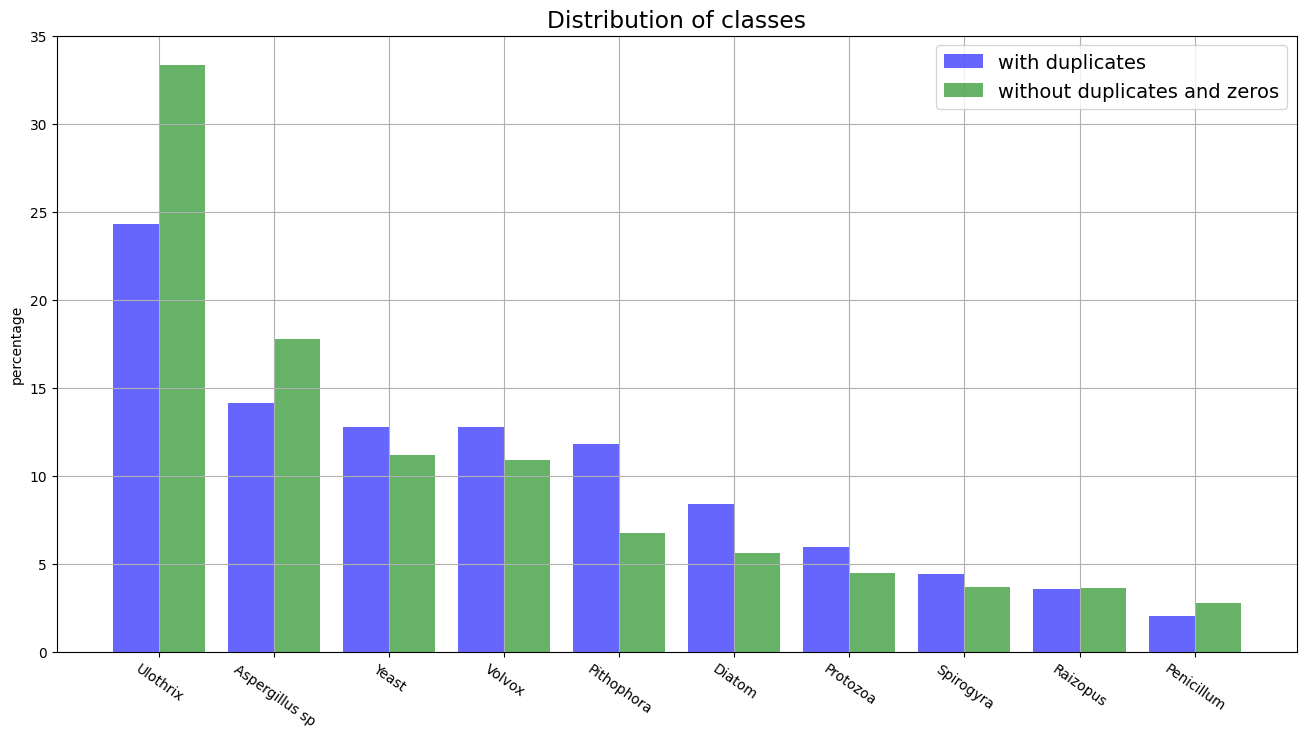

In [1681]:
class_distribution = df['microorganisms'].value_counts(normalize=True)*100
df_truncated = df.drop_duplicates(keep='first')
df_truncated = df_truncated.loc[~(df_truncated == 0.0).any(axis=1)]
class_distribution_truncated = df_truncated['microorganisms'].value_counts(normalize=True)*100

print('number of classes: ', len(class_distribution))

fig, ax = plt.subplots(figsize=(16, 8))
plt.rcParams.update({'font.size': 14})
indices = np.arange(0,10,1)

bar_width = 0.4
bars1 = ax.bar(indices, class_distribution, bar_width, label='with duplicates', color='blue', alpha=0.6)
bars2 = ax.bar(indices + bar_width, class_distribution_truncated, bar_width, label='without duplicates and zeros', color='green', alpha=0.6)

ax.set_ylabel('percentage')
ax.set_xticks(indices + bar_width / 2)
ax.set_xticklabels(class_distribution_truncated.index)


plt.title('Distribution of classes')
plt.xticks(rotation= -35)
plt.grid()
plt.legend()

We can observe that dataset is **highly** imbalanced.

### Boxplots and outliers

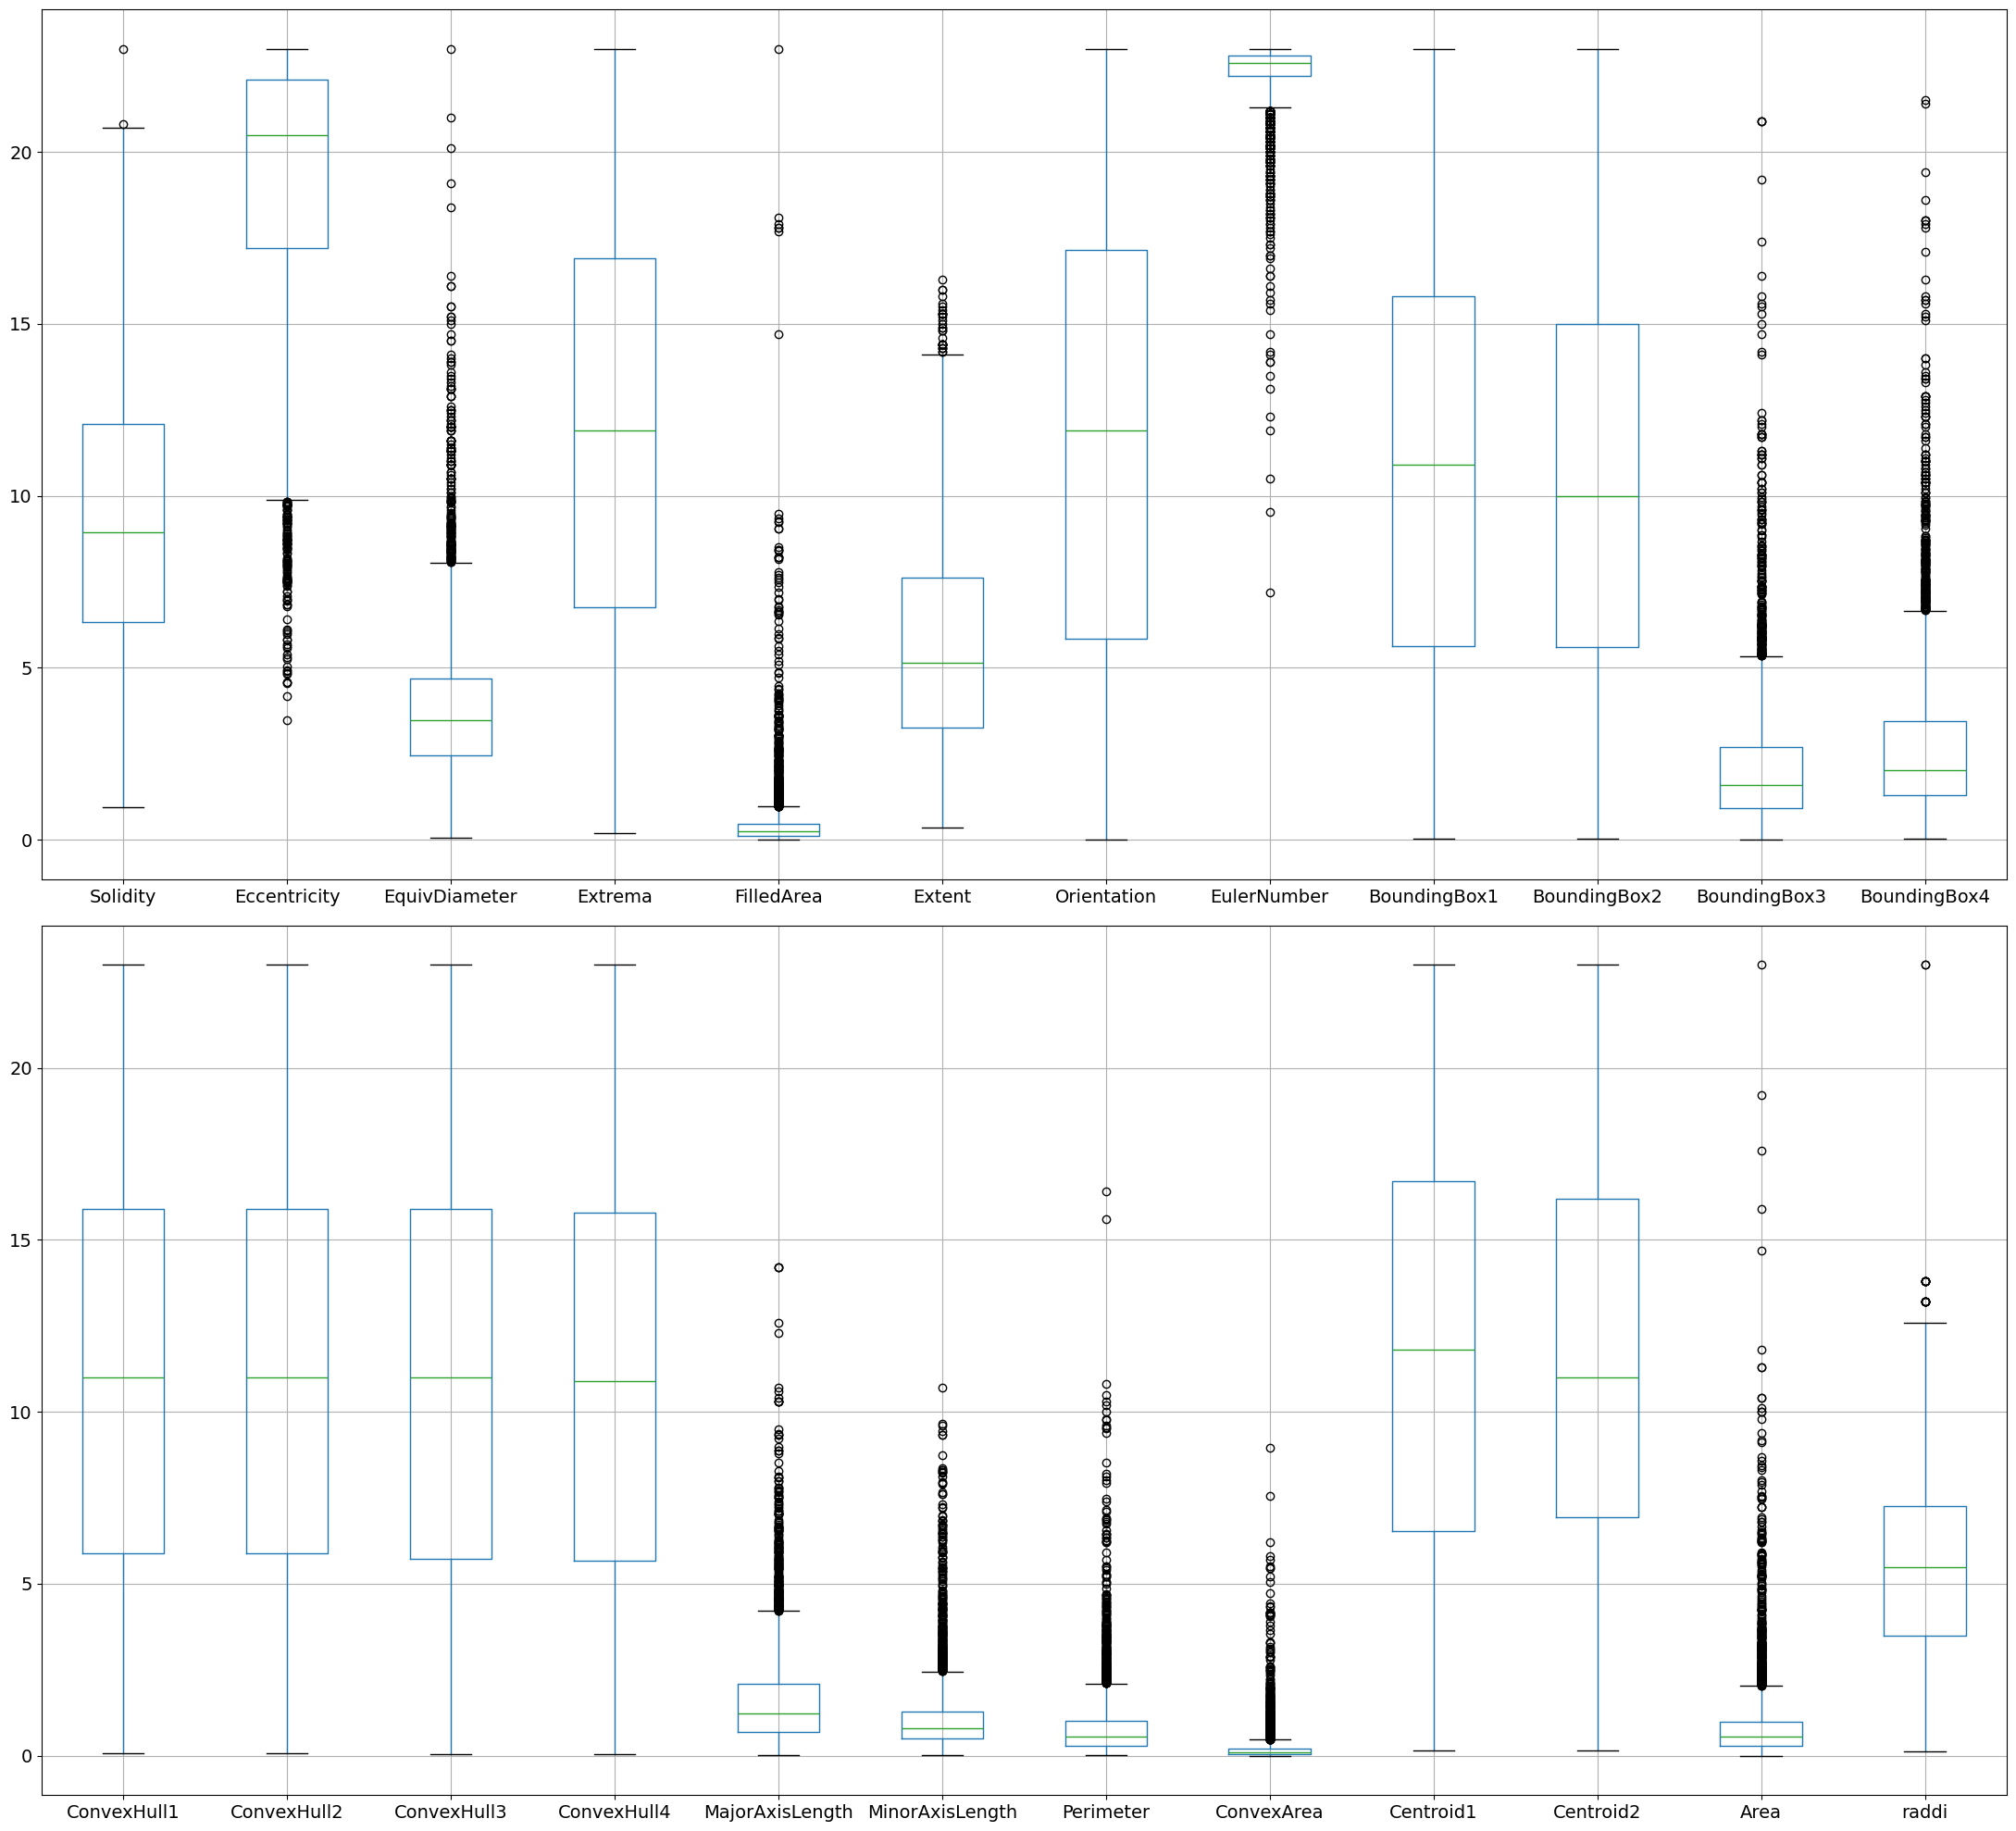

In [1682]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(22, 20))
df_truncated.boxplot(ax=ax1, column=list(df.columns)[:12], fontsize=14)
df_truncated.boxplot(ax=ax2, column=list(df.columns)[12:24], fontsize=14)
#df.boxplot(ax=ax1, column=list(df.columns)[:12], fontsize=14)
#df.boxplot(ax=ax2, column=list(df.columns)[12:24], fontsize=14)
plt.tight_layout()

From the boxplots above we can clearly see that the dataset contains a lot of extreme outliers.

In [1683]:
# не обращай внимания
intquartrange = []
for feature in df_truncated.columns[:-1]:
    Q1 = np.percentile(df_truncated[feature], 25, method='midpoint')
    Q3 = np.percentile(df_truncated[feature], 75, method='midpoint')
    IQR = Q3 - Q1
    intquartrange.append(IQR)

In [1684]:
std = df_truncated.loc[:, df_truncated.columns[0]:df_truncated.columns[23]].std(axis=0)
mean = df_truncated.loc[:, df_truncated.columns[0]:df_truncated.columns[23]].mean(axis=0)

outliers = pd.DataFrame()
for i in df_truncated.columns[:-1]:
    outliers[i] = (abs(df_truncated[i]-mean.loc[i]) > (3*std.loc[i]))

not_outliers = pd.DataFrame()
for i in df_truncated.columns[:-1]:
    not_outliers[i] = (abs(df_truncated[i]-mean.loc[i]) <= (3*std.loc[i]))

print('overall number of outliers:', max(df_truncated.drop('microorganisms', axis=1)[not_outliers].isna().sum()))

overall number of outliers: 105


Since we already deleted a lot of data points from the dataset it will not be a great idea to delete outliers as well.  
Thus, we need to transform them and keep in the dataset.

In [1685]:
# MinMaxScaler

### Distribution of features

<Figure size 2200x2000 with 0 Axes>

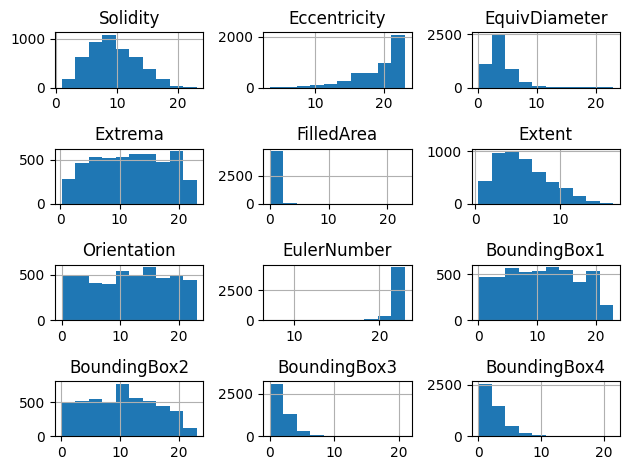

In [1686]:
plt.rcParams.update({'font.size': 10})
plt.figure(figsize=(22, 20))
df_truncated[df_truncated.columns[:12]].hist()
plt.tight_layout()

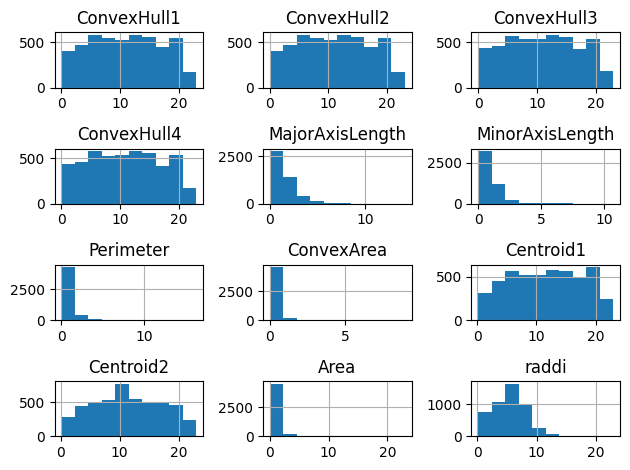

In [1687]:
plt.rcParams.update({'font.size': 10})
df_truncated.loc[:, df_truncated.columns[12:24]].hist()
plt.tight_layout()

### Corellation matrix

<Axes: >

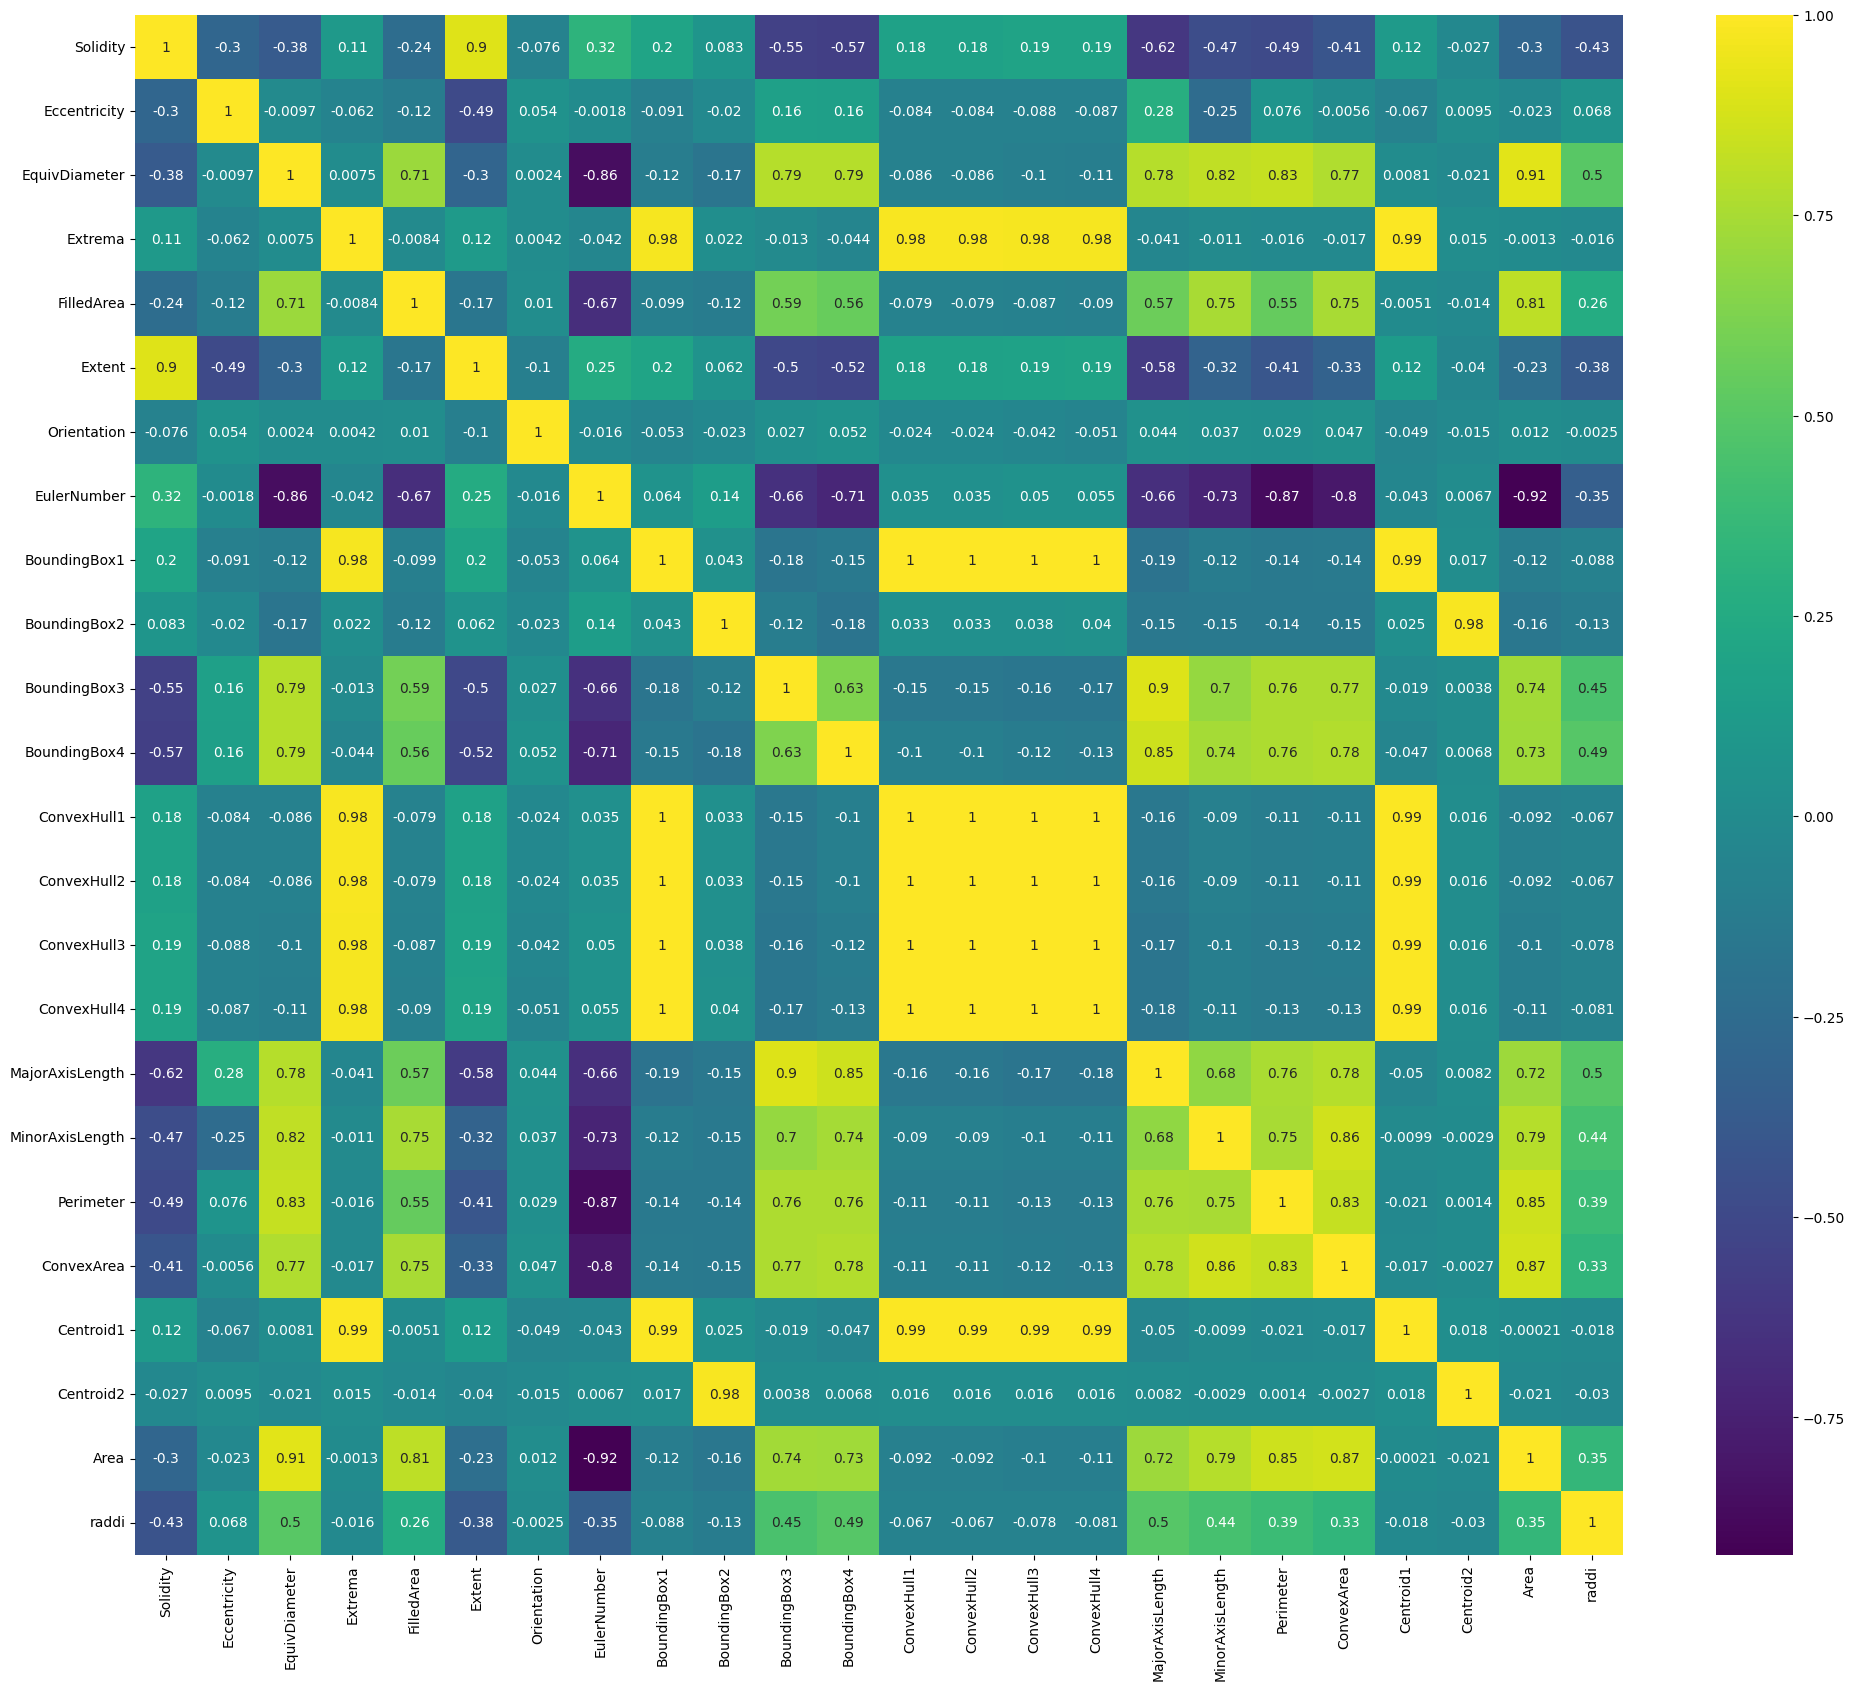

In [1688]:
#df_truncated.drop(columns=['ConvexHull2'], inplace=True)

matrix = df_truncated.drop('microorganisms', axis=1).corr()
plt.figure(figsize=(24,20))
sns.heatmap(matrix, cmap="viridis", annot=True)